In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
from keras.utils import np_utils

from tqdm import trange

plt.style.use('seaborn-darkgrid')
mpl.rcParams['figure.figsize'] = [10.0, 4.0]
mpl.rcParams['figure.dpi'] = 80
mpl.rcParams['savefig.dpi'] = 100
mpl.rcParams['font.size'] = 18

Using TensorFlow backend.


In [3]:
param_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"]

In [4]:
X_val = np.load("../data/X_val.npy").reshape((10000,28,28))
Y_val = np.load("../data/Y_val.npy")

In [5]:
asdf1 = np.loadtxt("../data/Julie_guesses.dat")
asdf2 = np.loadtxt("../data/Jonas_guesses.dat")
asdf3 = np.loadtxt("../data/jakob_guesses.dat")

In [11]:
_, actual1, guessed1 = asdf1.T
_, actual2, guessed2 = asdf2.T
_, actual3, guessed3 = asdf3.T

In [12]:
correct1 = actual1 == guessed1
correct2 = actual2 == guessed2
correct3 = actual3 == guessed3
nr_guesses1 = len(correct1)
nr_guesses2 = len(correct2)
nr_guesses3 = len(correct3)

In [58]:
burnin = 5

cum_correct1 = np.zeros(nr_guesses1-burnin)
for i in range(nr_guesses1-burnin):
    cum_correct1[i] = np.mean(correct1[:i+burnin])
    
cum_correct2 = np.zeros(nr_guesses2-burnin)
for i in range(nr_guesses2-burnin):
    cum_correct2[i] = np.mean(correct2[:i+burnin])
    
cum_correct3 = np.zeros(nr_guesses3-burnin)
for i in range(nr_guesses3-burnin):
    cum_correct3[i] = np.mean(correct3[:i+burnin])

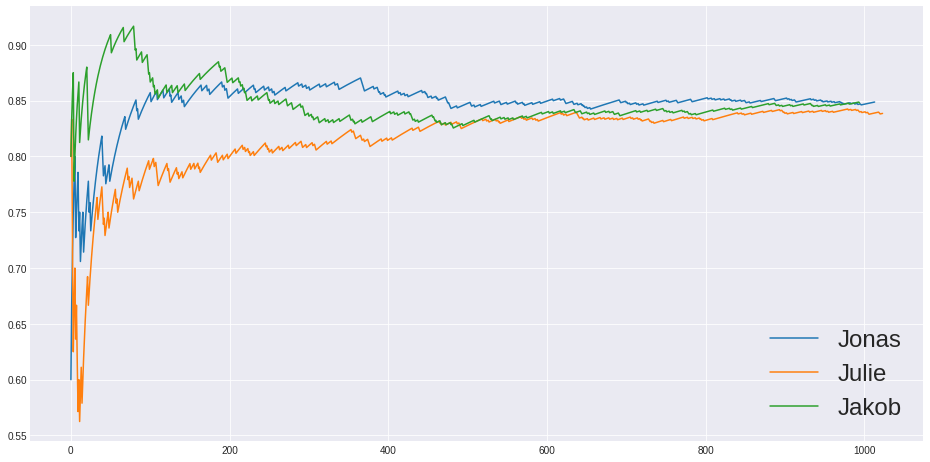

In [59]:
plt.figure(figsize=(16,8))
plt.plot(cum_correct1, label="Jonas")
plt.plot(cum_correct2, label="Julie")
plt.plot(cum_correct3, label="Jakob")
plt.legend(fontsize=24)

In [47]:
window_size = 1000

std1 = 50
std2 = 20

df_correct = pd.DataFrame(correct1)
window1 = df_correct.rolling(window_size, win_type="gaussian", center=True, min_periods=0).mean(std=std1)
window11 = df_correct.rolling(window_size, win_type="gaussian", center=True, min_periods=0).mean(std=std2)

df_correct = pd.DataFrame(correct2)
window2 = df_correct.rolling(window_size, win_type="gaussian", center=True, min_periods=0).mean(std=std1)
window22 = df_correct.rolling(window_size, win_type="gaussian", center=True, min_periods=0).mean(std=std2)

df_correct = pd.DataFrame(correct3)
window3 = df_correct.rolling(window_size, win_type="gaussian", center=True, min_periods=0).mean(std=std1)
window33 = df_correct.rolling(window_size, win_type="gaussian", center=True, min_periods=0).mean(std=std2)

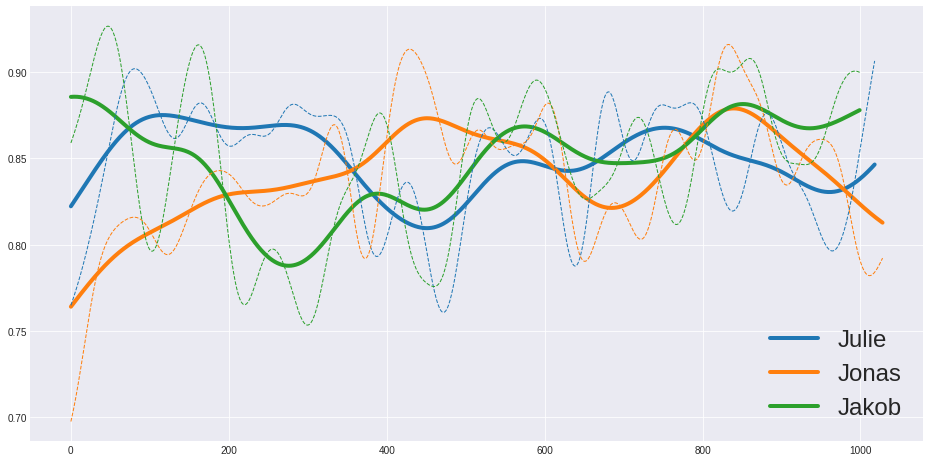

In [51]:
plt.figure(figsize=(16,8))
plt.plot(window1, lw=4, c="C0", label="Julie")
plt.plot(window2, lw=4, c="C1", label="Jonas")
plt.plot(window3, lw=4, c="C2", label="Jakob")

plt.plot(window11, lw=1, c="C0", ls="--")
plt.plot(window22, lw=1, c="C1", ls="--")
plt.plot(window33, lw=1, c="C2", ls="--")
plt.legend(fontsize=24)

In [67]:
f"{100*np.mean(correct1[300:]):.1f}%, {100*np.mean(correct2[300:]):.1f}%, {100*np.mean(correct3[300:]):.1f}%"

'84.3%, 85.0%, 85.3%'